# STOCK/CRPYTO PRICE PREDICTION MODEL

## The following code is an example on how to use simple data analysis tolls in order to set up a simple strategy for long and short term financial trading

### We will make use of the programing language python (3.x) which suits nicely for data anlysis

## --> This a very is simplified model for trading. One should always invest just as much money as one can afford to loose and do own studies in advance. 

## Required modules:
- numpy: the code is designed to be vectorized such that the numpy module can be used and calculations performed fast
- pandas: module for illustrative data frames
- yfinance: api module provided by yahoo finance to get current and previous asset prices
- matplotlib: (sub)module(s) for plots
- scipy: (sub)module for statistical and signal analysis

### CELLS YOU DO NOT NEED TO EXECUTE:

In [16]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np

### CELLS YOU CAN EXECUTE OPTIONALLY: 

#### --> This does not toggle the output of a cell:

In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

### CELLS YOU NEED TO EXECUTE IN ORDER TO BE UP-TO-DATE:

In [ ]:
your_path_to_folder_called_FINANCE = '###INSERT YOUR PATH HERE###'
import sys
sys.path.append(your_path_to_folder_called_FINANCE)

In [2]:
from model import MODEL
import utils, plotting, statistics
import pandas as pd

### CELLS YOU CAN MODIFY:

#### WARNING: Do not mix tickers from different markets/timezones. This can result in various NaN values if a filter is applied!

In [29]:
start_date = '2019-06-01' #your start date for the model.
day_hour = 18 #your intra-day time at which to evaluate the model.
tickers = ['BTC-USD', 'LTC-USD', 'XRP-USD'] #your tickers of interest.
tickers = 'BTC-USD'

### The main part starts here:

In [30]:
model = MODEL(tickers=tickers, periods=(50, 200, 100))
model.get_data(start=start_date, interval='60m')

[*********************100%***********************]  1 of 1 completed


In [31]:
start_date_range = pd.Timestamp(2019, 6, 1, day_hour)
date_range = utils.create_date_range(start_date=start_date_range)
model.apply_date_filter(date_range)
model.data.tail()

[WARNING]: Filter would result in 10 NaN values.
[USER-INPUT]: Remove NaN values?: y
[INFO]: filter applied.


,BTC-USD
Datetime,
2020-04-19 18:00:00+01:00,7216.310547
2020-04-20 18:00:00+01:00,6946.064941
2020-04-21 18:00:00+01:00,6894.629883
2020-04-22 18:00:00+01:00,7120.173828
2020-04-23 18:00:00+01:00,7453.809570


In [32]:
model.eval_model()

|                                  PRICE MODEL                                   |
|                                  Version 0.3                                   |
|                   Authors: Marco Rosenzweig & Patrick Lorenz                   |
----------------------------------------------------------------------------------
|                              ticker = ['BTC-USD']                              |
|                             start date = 06/02/19                              |
|                              end date = 04/23/20                               |
|                      initial investment per ticker = 200                       |
[INIT]: Initialising model for tickers: ['BTC-USD']
[INIT]: Successfully initialized model.
**********************************************************************************
[TICKER]: BTC-USD
[INFO]: Open position.
[INFO]: 649.36 tax was paid.
[INFO]: Last entry of "Sell Dates" will be assigned equally as the penultimate one.
-------

In [33]:
model.ticker_df['BTC-USD']

,Buy Dates,Sell Dates,Buy Prices,Sell Prices,Trade Reward,Trade Win,Trade Efficiency
0,2019-06-05 17:00:00,2019-06-26 17:00:00,7827.233438,13359.571546,341.361265,141.361265,0.706806
1,2019-06-28 17:00:00,2019-06-29 17:00:00,11859.252345,11901.858794,342.587666,1.226400,0.003593
2,2019-07-02 17:00:00,2019-07-04 17:00:00,10775.578740,11822.544661,375.873823,33.286157,0.097161
3,2019-07-07 17:00:00,2019-07-10 17:00:00,11509.180502,12231.693916,399.470106,23.596283,0.062777
4,2019-07-17 17:00:00,2019-07-20 17:00:00,9823.816846,10855.344421,441.415557,41.945451,0.105003
5,2019-07-24 17:00:00,2019-07-26 17:00:00,9642.613187,9748.360470,446.256412,4.840855,0.010967
6,2019-07-28 17:00:00,2019-08-06 17:00:00,9565.229266,11651.465146,543.587706,97.331294,0.218106
7,2019-08-15 17:00:00,2019-08-20 17:00:00,10051.224421,10711.797826,579.312665,35.724959,0.065721
8,2019-08-22 17:00:00,2019-08-23 17:00:00,10197.075854,10369.101241,589.085711,9.773045,0.016870
9,2019-08-25 17:00:00,2019-08-27 17:00:00,10112.180957,10140.726930,590.748658,1.662947,0.002823


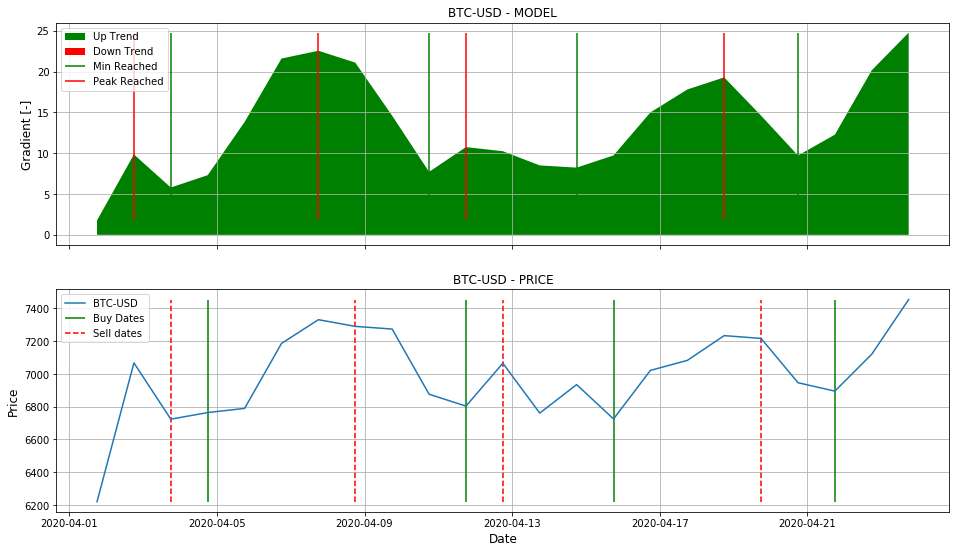

In [34]:
plotting.plot_model(model, tickers='all', plot_from_date='2020-04-01')

In [35]:
imag_model = model.copy_model()

In [36]:
imag_model.append_timedelta(timedelta=1)

[USER-INPUT]: Overwrite existing data? y


In [37]:
imag_model.data.tail(5)

,BTC-USD
2020-04-20 18:00:00+01:00,6946.064941
2020-04-21 18:00:00+01:00,6894.629883
2020-04-22 18:00:00+01:00,7120.173828
2020-04-23 18:00:00+01:00,7453.809570
2020-04-24 18:00:00+01:00,NaN


In [38]:
imag_model.comp_break_values()

[INFO]: Compute break values with 30.00% deviation
[INFO]: Current ticker: BTC-USD
[USER-INPUT]: Append breaking values w.r.t smallest tolerances? n
[INFO]: Current values: {'BTC-USD': 7453.8095703125}
[INFO]: Break values: {'BTC-USD': [7489.587856249549, 7169.074044726175]}
[INFO]: Tolerances: {'BTC-USD': array([  35.77828594, -284.73552559])}


In [39]:
imag_model._init_model()
imag_model.data.tail(5)

[INIT]: Initialising model for tickers: ['BTC-USD']
[INIT]: Successfully initialized model.
**********************************************************************************


,BTC-USD
2020-04-20 18:00:00+01:00,6946.064941
2020-04-21 18:00:00+01:00,6894.629883
2020-04-22 18:00:00+01:00,7120.173828
2020-04-23 18:00:00+01:00,7453.809570
2020-04-24 18:00:00+01:00,NaN


[INFO]: Current ticker: BTC-USD
----------------------------------------------------------------------------------
[INFO]: Result for value: 7079.460619167098


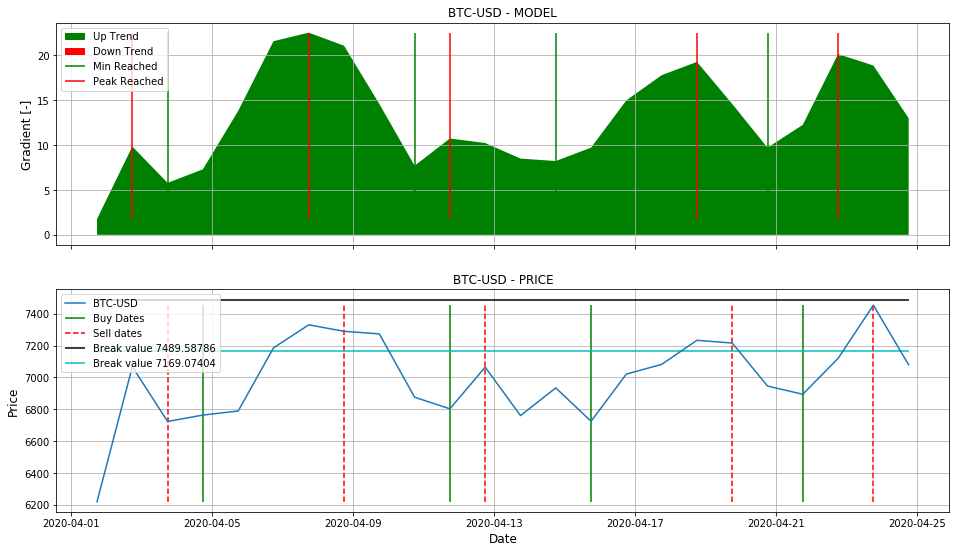

----------------------------------------------------------------------------------
[INFO]: Result for value: 7329.330950487862


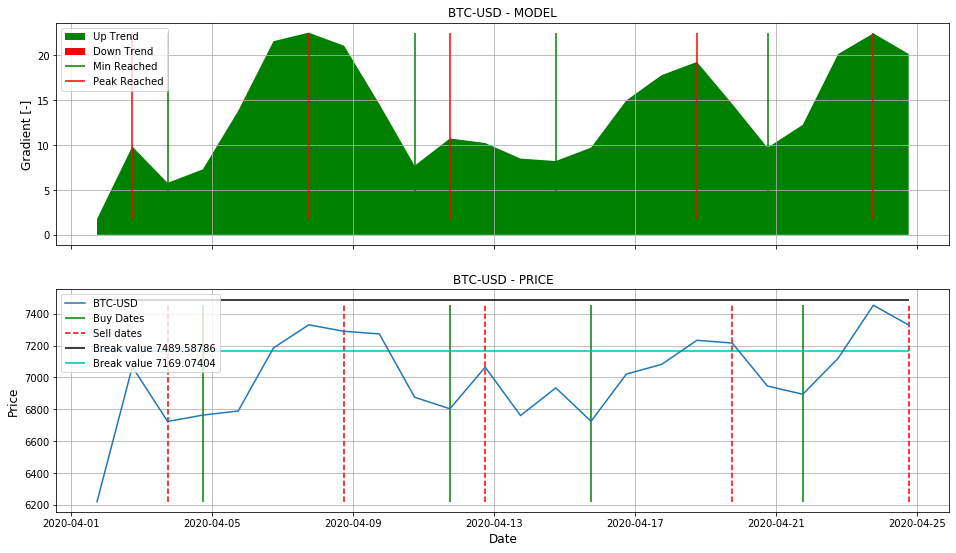

----------------------------------------------------------------------------------
[INFO]: Result for value: 7583.207704452668


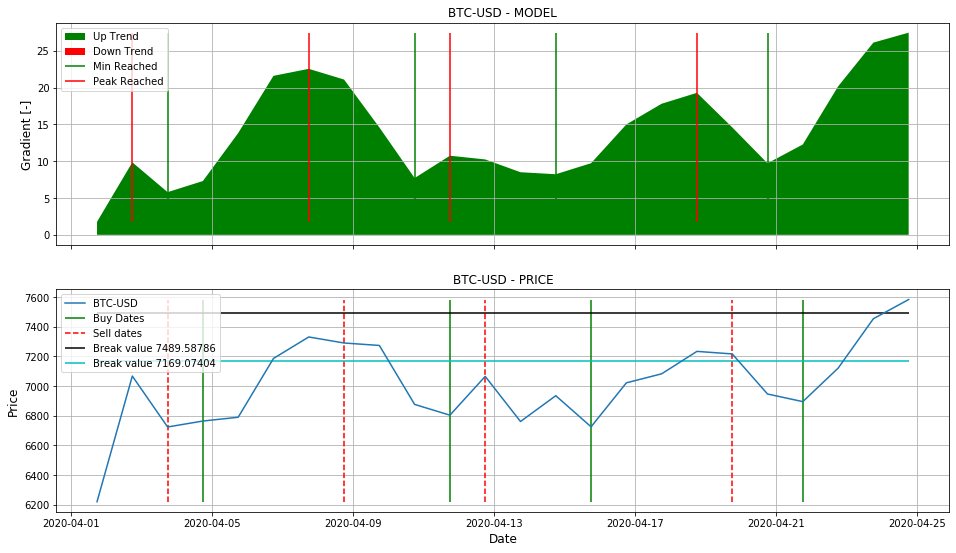

In [40]:
imag_model.show_possibilities(plot_from_date='2020-04-01', switch_axes=False)

[INFO]: Current ticker: BTC-USD
[*********************100%***********************]  1 of 1 completed
[STATS-INFO]: Auto update of tolerances!
[*********************100%***********************]  1 of 1 completed
[STATS-INFO]: Current value: 7460.146484375!
[STATS-INFO]: New tolerances: [  29.44137187 -291.07243965]!
[STATS-EVAL]: Probability for tol=-291.07244: 16.97%
[STATS-EVAL]: Probability for tol=29.44137: 46.58%
[STATS-EVAL]: Probability between: 29.61%


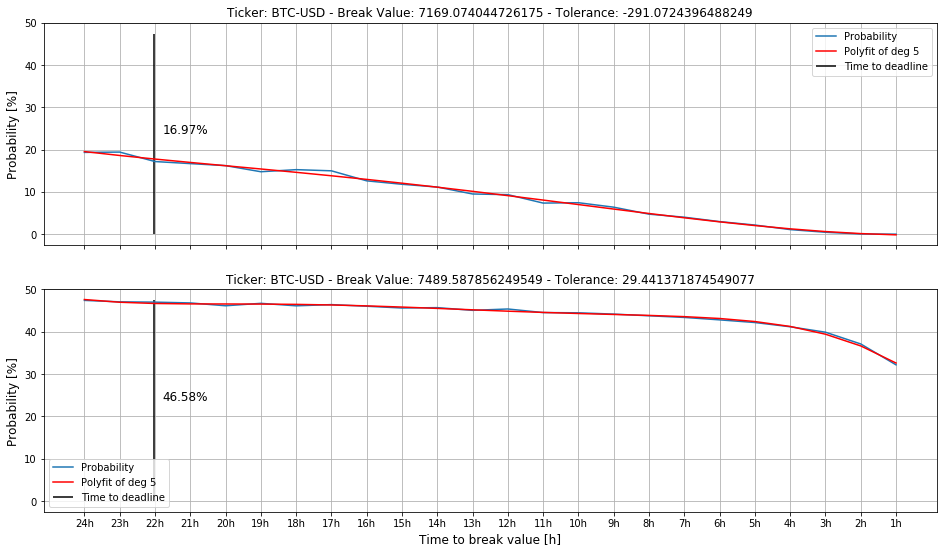

In [42]:
statistics.calc_probs(model=imag_model, tickers='all', auto_update_tolerances=True)